In [53]:
import numpy as np
import pandas as pd
import os

"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, names=names, encoding='utf-8')
        return df
    
    return None

filepath = "data/credit.csv"
df = load_csv(filepath)
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [54]:
# Cleansing Data
df = df.iloc[:, 1:]
df["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
df["Student"].replace({"No": 0, "Yes": 1}, inplace=True)
df["Married"].replace({"No": 0, "Yes": 1}, inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


In [55]:
df["Ethnicity"].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [56]:
# Converting Ehtnicity using label binarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit(df['Ethnicity'])
transformed = encoder.transform(df['Ethnicity'])
one_hot_df = pd.DataFrame(transformed, columns=encoder.classes_)
df = pd.concat([df, one_hot_df], axis=1).drop(['Ethnicity'], axis=1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,1,0,1,333,0,0,1
1,106.025,6645,483,3,82,15,0,1,1,903,0,1,0
2,104.593,7075,514,4,71,11,1,0,0,580,0,1,0
3,148.924,9504,681,3,36,11,0,0,0,964,0,1,0
4,55.882,4897,357,2,68,16,1,0,1,331,0,0,1


In [57]:
# Store Target dimension and remover target dimension before performing PCA on remaining dimensions
Y = df["Limit"]
df = df.drop(['Limit'], axis=1) 
df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,14.891,283,2,34,11,1,0,1,333,0,0,1
1,106.025,483,3,82,15,0,1,1,903,0,1,0
2,104.593,514,4,71,11,1,0,0,580,0,1,0
3,148.924,681,3,36,11,0,0,0,964,0,1,0
4,55.882,357,2,68,16,1,0,1,331,0,0,1


In [59]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df.values)
standardized_df = pd.DataFrame(x,columns=df.columns)
standardized_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,-0.861583,-0.465539,-0.699130,-1.257674,-0.784930,1.035635,-0.333333,0.795395,-0.407277,-0.573501,-0.585049,1.005013
1,1.727437,0.828703,0.031032,1.528451,0.496588,-0.965592,3.000000,0.795395,0.834056,-0.573501,1.709260,-0.995012
2,1.686756,1.029311,0.761194,0.889964,-0.784930,1.035635,-0.333333,-1.257237,0.130634,-0.573501,1.709260,-0.995012
3,2.946152,2.110003,0.031032,-1.141586,-0.784930,-0.965592,-0.333333,-1.257237,0.966900,-0.573501,1.709260,-0.995012
4,0.302928,0.013331,-0.699130,0.715831,0.816968,1.035635,-0.333333,0.795395,-0.411633,-0.573501,-0.585049,1.005013


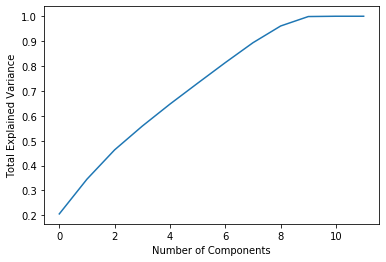

In [60]:
# PCA transformation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Let's examine the PVE chart
pca = PCA().fit(standardized_df)

evr = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

In [62]:
# Looks like 8 principal components explains a lot
pca = PCA(n_components=8)

components = pca.fit_transform(standardized_df)
components_df = pd.DataFrame(components)
components_df.head()

,0,1,2,3,4,5,6,7
0,-1.197174,-1.377795,-0.407099,-0.288746,-0.567999,1.490721,0.431274,-0.823719
1,2.299987,1.609102,-1.814057,1.467405,0.401328,-1.745076,-0.661679,0.490795
2,1.638190,1.148009,-0.585187,-1.475061,1.535295,-0.529848,-1.149926,-1.208968
3,3.197603,1.172877,-1.381277,-0.427251,0.892278,-0.234596,1.144787,-1.169167
4,-0.106674,-1.302326,-0.053363,-0.461042,-1.378400,-0.269577,-1.118377,-0.203497


In [65]:
from sklearn.linear_model import LinearRegression
# Perform Multivariant linear regression on the PCA components
# Linear regression again...
lin_reg = LinearRegression()
lin_reg.fit(components_df, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lin_reg.score(components_df,Y)

0.9692280772662073

In [68]:
lin_reg.coef_

array([1428.19284063,  -72.09767017,  -79.29635292, -175.5831032 ,
       -182.53406895,   58.0474366 ,  111.07964397, -115.23154652])

In [69]:
lin_reg.intercept_

4735.6